In [ ]:
!pip -q install table-rl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.0 MB/s eta 0:00:00


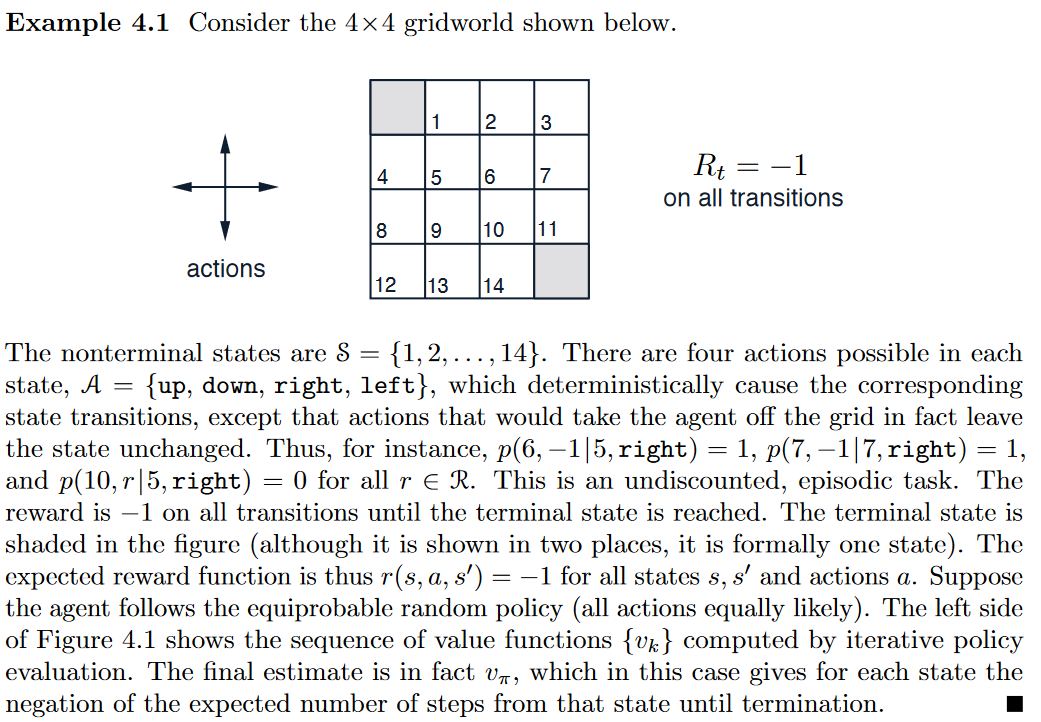

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self):
        # num_rows=15, num_columns=4
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((15, 4, 15))

        # Handle up
        for state in range(1,15):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,15):
            next_state = state if state + 4 >= 15 else state + 4
            if state == 11:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,15):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, 15):
            next_state = state if state % 4 == 3 else state + 1
            if state == 14:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(15):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((15, 4, 15), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(15, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, 15)
        info = {}
        self.current_state = obs
        return obs, info

<Axes: xlabel='Episode', ylabel='Episode Reward'>

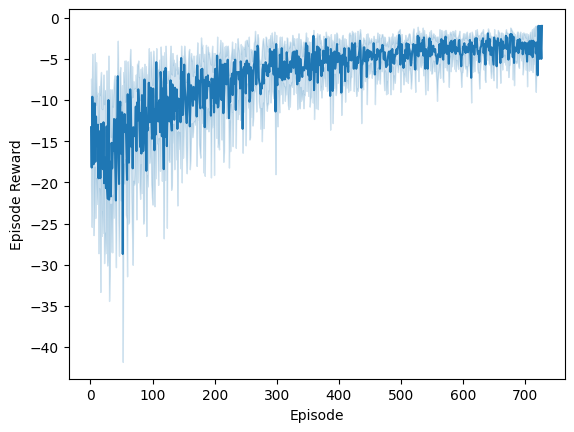

In [ ]:
env = BasicGridworld()

T = env.T
discount = env.discount

explorer = table_rl.explorers.ConstantEpsilonGreedy(0.1, T.shape[1])
agent = table_rl.learners.QLearning(
                  num_states = T.shape[0],
                  num_actions = T.shape[1],
                  learning_rate=0.02,
                  explorer=explorer,
                  discount=discount,
                  initial_val=0.)

observation, info = env.reset()
base_agent = copy.deepcopy(agent)

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep"]
df = pd.DataFrame([], columns=dfColumns)

for agent_id in range(10):
    agent = copy.deepcopy(base_agent)
    episode_reward = 0
    episode = 0

    for ts in range(5000):
        action = agent.act(observation, True)
        observation, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward

        if(terminated):
            episode += 1

            d = pd.DataFrame([[agent_id, episode_reward, episode, ts]], columns=dfColumns)
            df = pd.concat([df, d], ignore_index=True)

            episode_reward = 0

        agent.observe(observation, reward, terminated, truncated)

        if terminated or truncated:
            observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

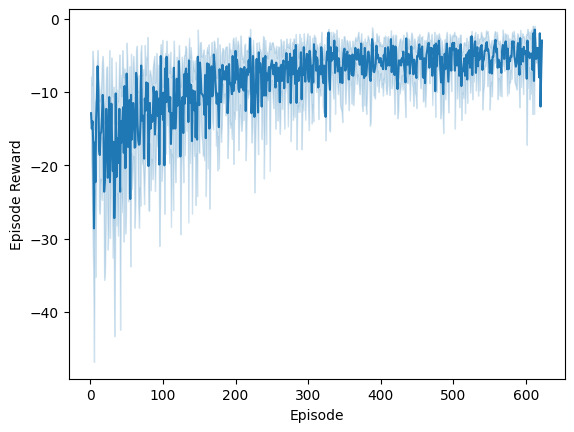

In [ ]:
env = BasicGridworld()

T = env.T
discount = env.discount

explorer = table_rl.explorers.ConstantEpsilonGreedy(0.5, T.shape[1])
agent = table_rl.learners.QLearning(
                  num_states = T.shape[0],
                  num_actions = T.shape[1],
                  learning_rate=0.02,
                  explorer=explorer,
                  discount=discount,
                  initial_val=0.)

observation, info = env.reset()
base_agent = copy.deepcopy(agent)

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep"]
df = pd.DataFrame([], columns=dfColumns)

for agent_id in range(10):
    agent = copy.deepcopy(base_agent)
    episode_reward = 0
    episode = 0

    for ts in range(5000):
        action = agent.act(observation, True)
        observation, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward

        if(terminated):
            episode += 1

            d = pd.DataFrame([[agent_id, episode_reward, episode, ts]], columns=dfColumns)
            df = pd.concat([df, d], ignore_index=True)

            episode_reward = 0

        agent.observe(observation, reward, terminated, truncated)

        if terminated or truncated:
            observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

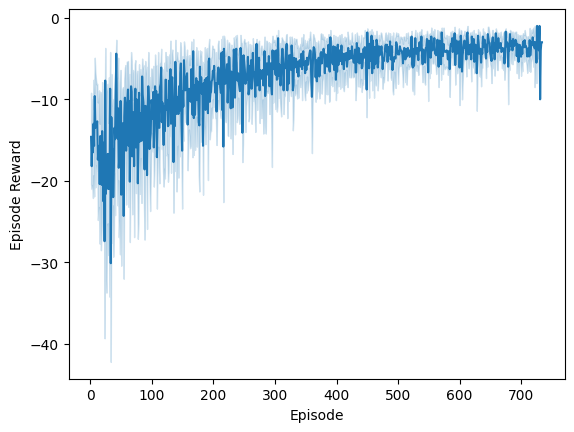

In [ ]:
env = BasicGridworld()

T = env.T
discount = env.discount

explorer = table_rl.explorers.ConstantEpsilonGreedy(0.01, T.shape[1])
agent = table_rl.learners.QLearning(
                  num_states = T.shape[0],
                  num_actions = T.shape[1],
                  learning_rate=0.02,
                  explorer=explorer,
                  discount=discount,
                  initial_val=0.)

observation, info = env.reset()
base_agent = copy.deepcopy(agent)

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep"]
df = pd.DataFrame([], columns=dfColumns)

for agent_id in range(10):
    agent = copy.deepcopy(base_agent)
    episode_reward = 0
    episode = 0

    for ts in range(5000):
        action = agent.act(observation, True)
        observation, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward

        if(terminated):
            episode += 1

            d = pd.DataFrame([[agent_id, episode_reward, episode, ts]], columns=dfColumns)
            df = pd.concat([df, d], ignore_index=True)

            episode_reward = 0

        agent.observe(observation, reward, terminated, truncated)

        if terminated or truncated:
            observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

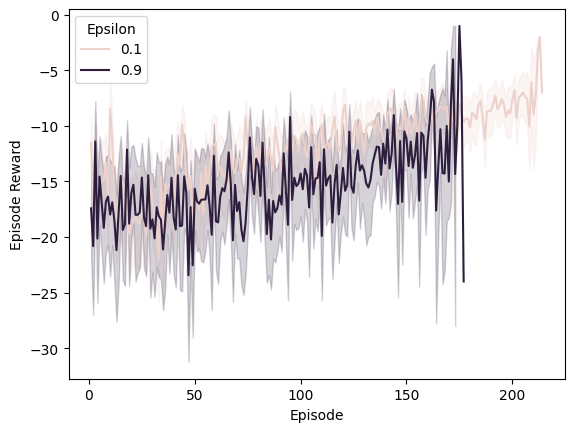

In [ ]:
env = BasicGridworld()

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
epsilons = [0.1, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Epsilon"]
df = pd.DataFrame([], columns=dfColumns)

for epsilon in epsilons:
  explorer = table_rl.explorers.ConstantEpsilonGreedy(epsilon, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=0.02,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, epsilon]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Epsilon")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

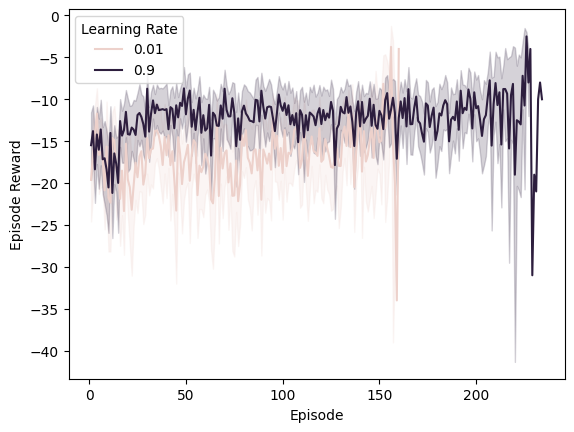

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

# Example of exploration-exploitation tradeoff
class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self, numStates = 15):
        self.numStates = int(numStates)
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((self.numStates, 4, self.numStates))

        # Handle up
        for state in range(1,self.numStates):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,self.numStates):
            next_state = state if state + 4 >= self.numStates else state + 4
            if state % 11 == 0:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,self.numStates):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, 15):
            next_state = state if state % 4 == 3 else state + 1
            if state == 14:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(self.numStates):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((self.numStates, 4, self.numStates), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(self.numStates, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, self.numStates)
        info = {}
        self.current_state = obs
        return obs, info

env = BasicGridworld()

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
lrs = [0.01, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Learning Rate"]
df = pd.DataFrame([], columns=dfColumns)

for lr in lrs:
  explorer = table_rl.explorers.ConstantEpsilonGreedy(epsilon, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=lr,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, lr]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Learning Rate")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

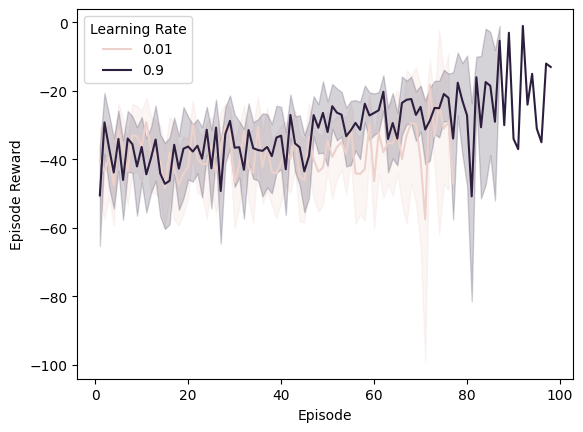

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

# Example of exploration-exploitation tradeoff
class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self, numStates = 15):
        self.numStates = int(numStates)
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((self.numStates, 4, self.numStates))

        # Handle up
        for state in range(1,self.numStates):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,self.numStates):
            next_state = state if state + 4 >= self.numStates else state + 4
            if state % 11 == 0:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,self.numStates):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, self.numStates):
            next_state = state if state % 4 == 3 else state + 1
            if state == self.numStates - 1:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(self.numStates):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((self.numStates, 4, self.numStates), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(self.numStates, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, self.numStates)
        info = {}
        self.current_state = obs
        return obs, info

env = BasicGridworld(100)

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
lrs = [0.01, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Learning Rate"]
df = pd.DataFrame([], columns=dfColumns)

for lr in lrs:
  explorer = table_rl.explorers.ConstantEpsilonGreedy(epsilon, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=lr,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, lr]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Learning Rate")

# Linear Decay Epsilon Reduction Strategy

<Axes: xlabel='Episode', ylabel='Episode Reward'>

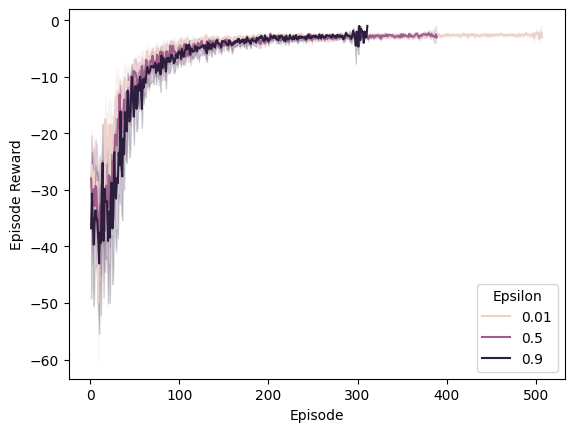

In [15]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

# Example of exploration-exploitation tradeoff
class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self, numStates = 15):
        self.numStates = int(numStates)
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((self.numStates, 4, self.numStates))

        # Handle up
        for state in range(1,self.numStates):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,self.numStates):
            next_state = state if state + 4 >= self.numStates else state + 4
            if state % 11 == 0:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,self.numStates):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, self.numStates):
            next_state = state if state % 4 == 3 else state + 1
            if state == self.numStates - 1:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(self.numStates):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((self.numStates, 4, self.numStates), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(self.numStates, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, self.numStates)
        info = {}
        self.current_state = obs
        return obs, info

env = BasicGridworld(100)

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
eps = [0.01, 0.5, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Epsilon"]
df = pd.DataFrame([], columns=dfColumns)

for ep in eps:
  #explorer = table_rl.explorers.ConstantEpsilonGreedy(epsilon, T.shape[1])
  explorer = table_rl.explorers.LinearDecayEpsilonGreedy(ep, 0, 2500, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=lr,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, ep]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Epsilon")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

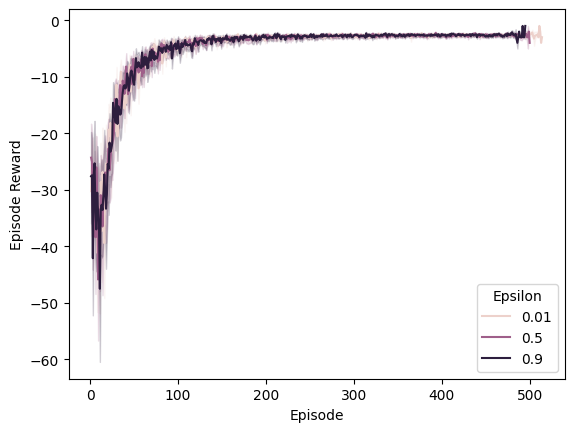

In [17]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

# Example of exploration-exploitation tradeoff
class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self, numStates = 15):
        self.numStates = int(numStates)
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((self.numStates, 4, self.numStates))

        # Handle up
        for state in range(1,self.numStates):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,self.numStates):
            next_state = state if state + 4 >= self.numStates else state + 4
            if state % 11 == 0:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,self.numStates):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, self.numStates):
            next_state = state if state % 4 == 3 else state + 1
            if state == self.numStates - 1:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(self.numStates):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((self.numStates, 4, self.numStates), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(self.numStates, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, self.numStates)
        info = {}
        self.current_state = obs
        return obs, info

env = BasicGridworld(100)

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
eps = [0.01, 0.5, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Epsilon"]
df = pd.DataFrame([], columns=dfColumns)

for ep in eps:
  #explorer = table_rl.explorers.ConstantEpsilonGreedy(epsilon, T.shape[1])
  # https://www.wolframalpha.com/input?i=0.995%5Ex+from+0+to+2500 see the graph of the exploration rate here
  explorer = table_rl.explorers.PercentageDecayEpsilonGreedy(ep, 0, 0.995, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=lr,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, ep]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Epsilon")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

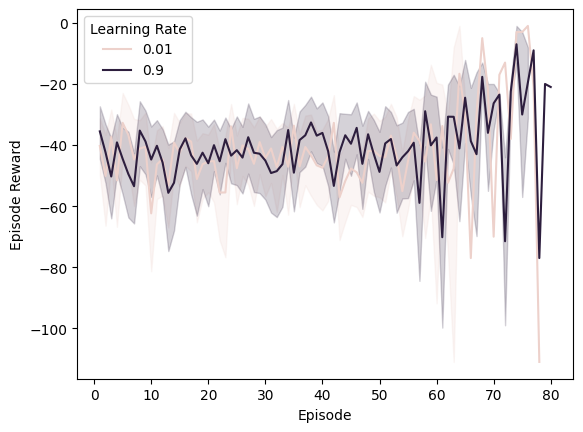

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

# Example of exploration-exploitation tradeoff
class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self, numStates = 15):
        self.numStates = int(numStates)
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((self.numStates, 4, self.numStates))

        # Handle up
        for state in range(1,self.numStates):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,self.numStates):
            next_state = state if state + 4 >= self.numStates else state + 4
            if state % 11 == 0:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,self.numStates):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, self.numStates):
            next_state = state if state % 4 == 3 else state + 1
            if state == self.numStates - 1:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(self.numStates):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((self.numStates, 4, self.numStates), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(self.numStates, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, self.numStates)
        info = {}
        self.current_state = obs
        return obs, info

env = BasicGridworld(1000)

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
lrs = [0.01, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Learning Rate"]
df = pd.DataFrame([], columns=dfColumns)

for lr in lrs:
  explorer = table_rl.explorers.ConstantEpsilonGreedy(epsilon, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=lr,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, lr]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Learning Rate")

<Axes: xlabel='Episode', ylabel='Episode Reward'>

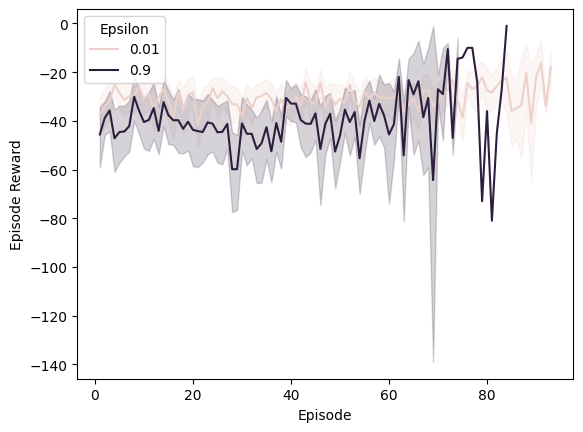

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import table_rl
import gymnasium

# Example of exploration-exploitation tradeoff
class BasicGridworld(gymnasium.Env):
    '''
        Implements the gridworld from example 4.1 of the RL book by Sutton and Barto: http://incompleteideas.net/book/RLbook2020.pdf
    '''
    def __init__(self, numStates = 15):
        self.numStates = int(numStates)
        self.construct_transition()
        self.construct_reward()
        self.discount = 0.9

    def construct_transition(self):
        self.T = np.zeros((self.numStates, 4, self.numStates))

        # Handle up
        for state in range(1,self.numStates):
            next_state = state if state - 4 < 0 else state - 4
            self.T[state, 0, next_state] = 1.0

        # Handle down
        for state in range(1,self.numStates):
            next_state = state if state + 4 >= self.numStates else state + 4
            if state % 11 == 0:
                next_state = 0
            self.T[state, 1, next_state] = 1.0

        # Handle left
        for state in range(1,self.numStates):
            next_state = state if state % 4 == 0 else state - 1
            self.T[state, 2, next_state] = 1.0

        # Handle right
        for state in range(1, self.numStates):
            next_state = state if state % 4 == 3 else state + 1
            if state == self.numStates - 1:
                next_state = 0
            self.T[state, 3, next_state] = 1.0

        # Assuming UDLR
        self.T[0, :, 0] = 1.0 # terminal transitions
        for state in range(self.numStates):
            for action in range(4):
                assert np.sum(self.T[state, action]) == 1


    def construct_reward(self):
        self.R = np.full((self.numStates, 4, self.numStates), -1)
        self.R[0,:,:] = 0

    def step(self, action):
        next_state = np.random.choice(self.numStates, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, self.numStates)
        info = {}
        self.current_state = obs
        return obs, info

env = BasicGridworld(10000)
env.discount = 0.995

T = env.T
discount = env.discount

# https://github.com/prabhatnagarajan/table-rl/blob/main/table_rl/explorers/epsilon_greedy.py
eps = [0.01, 0.9]

dfColumns = ["Agent", "Episode Reward", "Episode", "Timestep", "Epsilon"]
df = pd.DataFrame([], columns=dfColumns)

for ep in eps:
  explorer = table_rl.explorers.ConstantEpsilonGreedy(ep, T.shape[1])
  agent = table_rl.learners.QLearning(
                    num_states = T.shape[0],
                    num_actions = T.shape[1],
                    learning_rate=0.02,
                    explorer=explorer,
                    discount=discount,
                    initial_val=0.)

  observation, info = env.reset()
  base_agent = copy.deepcopy(agent)

  for agent_id in range(50):
      agent = copy.deepcopy(base_agent)
      episode_reward = 0
      episode = 0

      for ts in range(2500):
          action = agent.act(observation, True)
          observation, reward, terminated, truncated, info = env.step(action)
          episode_reward += reward

          if(terminated):
              episode += 1

              d = pd.DataFrame([[agent_id, episode_reward, episode, ts, ep]], columns=dfColumns)
              df = pd.concat([df, d], ignore_index=True)

              episode_reward = 0

          agent.observe(observation, reward, terminated, truncated)

          if terminated or truncated:
              observation, info = env.reset()

sns.lineplot(data=df, x="Episode", y="Episode Reward", hue="Epsilon")

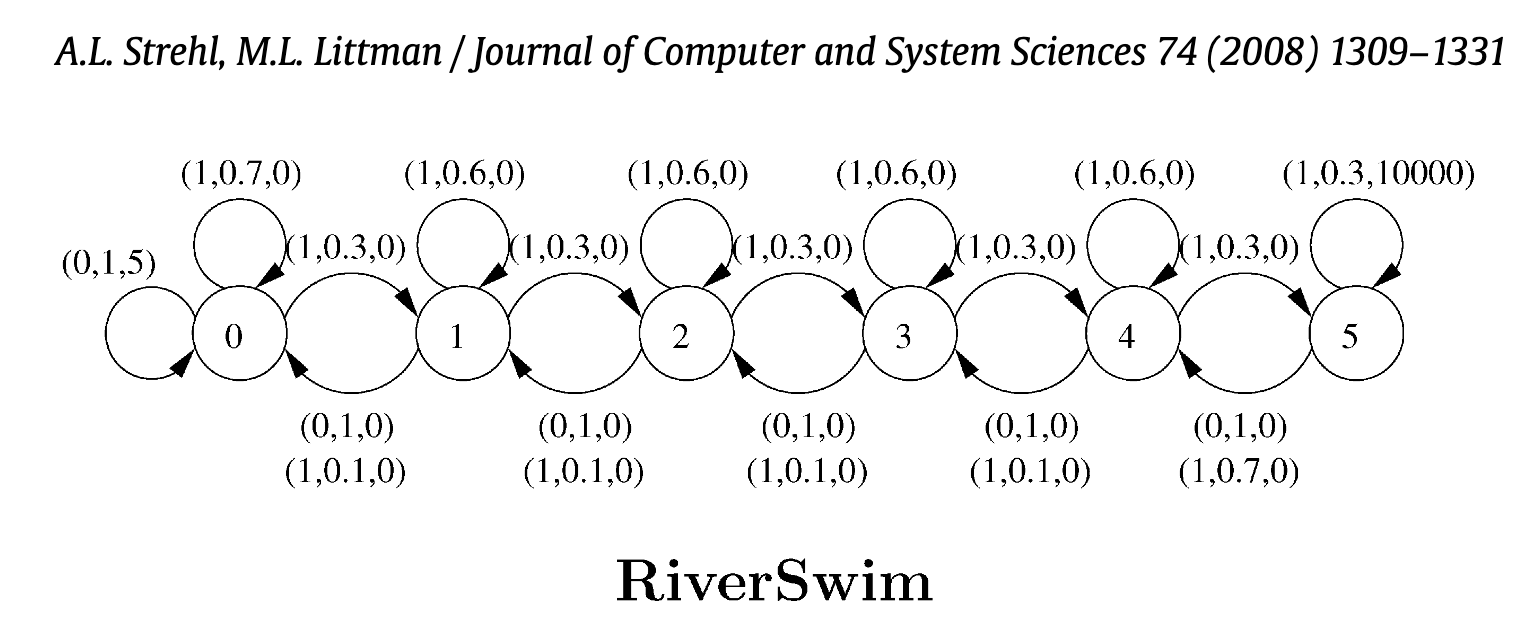

In [ ]:
import gymnasium
import numpy as np


class RiverSwimEnv(gymnasium.Env):
    '''
        Implements the RiverSwim MDP from Strehl and Littman's 2008 paper:
        ``An analysis of model-based Interval Estimation for Markov Decision Processes''
    '''
    def __init__(self):
        self.observation_space = gymnasium.spaces.Discrete(6)
        self.action_space = gymnasium.spaces.Discrete(2)
        self.discount = 0.9

        self.construct_transition()
        self.construct_reward()
        self.init_state_distribution = np.array([0, 0.5, 0.5, 0, 0, 0])


    def construct_transition(self):
        T = np.zeros((self.observation_space.n, self.action_space.n, self.observation_space.n))
        T[0:5, 1, 1:6] = 0.3
        T[1:, 0, 0:5] = 1.0
        T[1:5, 0, 0:5] = 0.1
        T[5, 1, 4] = 0.7
        T[1:5, 0, 1:5] = 0.6
        T[0, 0, 0] = 1.0
        T[0, 1, 0] = 0.7
        T[5, 1, 5] = 0.3

        self.T = T


    def construct_reward(self):
        R = np.zeros((self.observation_space.n, self.action_space.n, self.observation_space.n))
        R[0, 0, 0] = 5
        R[5, 1, 5] = 10000
        self.R = R

    def step(self, action):
        print(len(self.T[self.current_state,action]))
        next_state = np.random.choice(15, p=self.T[self.current_state,action])
        reward = self.R[self.current_state, action, next_state]
        self.current_state = next_state
        terminated = next_state == 0
        return next_state, reward, terminated, False, {}

    def reset(self):
        obs = np.random.randint(1, 15)
        info = {}
        self.current_state = obs
        return obs, info

env = RiverSwimEnv()

IndexError: index 6 is out of bounds for axis 0 with size 6